In [1]:
#_second_dataset_used_for_worldcloud_for_english_article_and_in_phd_thesis_in_anothor_folder
#_in_below_codes_for_comparing_the_classification_between_one_three_evaluator_and_the_model_classification_after_the_model_
#created_on_first_dataset

In [ ]:
#_LIBRARIES_#

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#sayi_vektör_matrislerini_standartlastirmakicin_algoritmaya_giris_oncesi
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
from sklearn import decomposition, ensemble

In [16]:
!pip install wordcloud

In [5]:
#Egitim_test_seti_ayrimi_capraz dogrulama_karmasiklik matrisi_roc_egrisi_degerlendirme_olcutleri
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,log_loss
from sklearn.metrics import roc_auc_score, roc_curve

In [6]:
#SINIFLANDIRMA_ALGORITMALARI
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
!pip install xgboost
from xgboost import XGBClassifier

In [8]:
from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
#VISUALIATION_Matplot ve Wordcloud
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [11]:
durak_kelime_listesi=[" acaba","akabinde","akebinde"," altında", " altta"," ama "," ancak"," aralarında",
                     " arasında "," arkadasında"," artık"," aslında "," aşağıdan", " aynen"," aynı "," ayrıca ",
                     " bana "," başka ","bazen"," bazı ","bazıları","bazısı","belki"," ben "," beni "," benim ",
                     "benzer ","benzeri "," bi "," bide "," bile ","binaenaleyh","bir defa","bir kere","bir kerecik",
                     "bir kimse","bir miktar","bir şey ","bir şeyi ","bir takım","bir vakitler","bir zamanlar",
                     "biraz ","birbirinden","birçoğu","birçokları","birde "," birisi ","birkaç ","birkaçı ","birşey ",
                     "birşeyi "," bişey "," biz ","bizatihi"," bize "," bizi ","bizim ","bizimki","bizzat","boyunca",
                     "böyle ","böylece ","böylelikle","böylesine","bu gibi","bu kadar","bu noktada","bu suretle",
                     "bu şekilde","bu türlü","bugünlerde","buna benzer","bundan başka","bunlar ","bunun gibi",
                     "bununla birlikte","burada ","buraya ","bütün ","civarında ","çevresinde "," çoğu "," çoğuna ",
                     " çoğunu ","çünkü", "daha evvel","daha önce ","daha ziyade"," dedi "," dedik "," dediler",
                     " dedim "," dedin "," dediniz "," değin "," demek ","demek ki"," demi ","dışarda ","dışarıda ",
                     "dışarıya "," diğer "," diğeri ","diğerleri "," dimi "," diye "," diyor ","dolayı "," ediyor ",
                     " eğer "," ek olarak "," elbette "," eskiden "," esnasında "," etmek "," etrafında "," evvelce ",
                     " evvelki ", "fakat"," falan "," felan "," filan "," gene ", " gibi "," hala ","halbuki","halinde",
                     " hangi "," hangisi "," hangisini "," hani "," hatta "," hep "," hepsi "," hepsine "," hepsini ",
                     "her biri ","her ikisi ","her ikisini ","her ne kadar","her tarafa "," herbiri ","herhangi bir ",
                     "herhangibir ","herkes ","herkese ","herkesi ","hiç birine","hiç birini ","hiçbirine ","hiçbirini ",
                     "hiç kimse ","içerisinde","içerisine"," için "," içinde "," içinden "," içine "," iken "," ikisi ",
                     " ikisini "," ilaveten "," ile "," ileri ", " ileride "," ileriye "," ilk "," ise "," işbu ", " işte",
                     "itibarıyla","itibarıyle","itibariyla","itibariyle","kadar ", "karşı ","kendi kendine ","kendi kendini ",
                     "kendi kendinin ","kendi kendisine ","kendi kendisini ","kendilerinde ","kendilerine ","kendilerini ",
                      "kendiliğinden","kendim ","kendin ","kendine ", "kendini ","kendinin ","kendiniz ","kendinize ",
                      "kendinizde ","kendisi ","kendisinin "," keza "," kim "," kime "," kimi "," kimin "," kimisi "," kimse ",
                      " lakin "," madem "," mıdır "," mısın "," mısınız "," mıydı "," mıyım "," midir "," misin "," misiniz ",
                      " miydi "," miyim "," mudur "," musun ","musunuz"," muydu ", " muyum ","müddetince"," müdür ",
                     " müsün "," müsünüz "," müydü "," müyüm ","nasıl", "ne kadar","ne sebeple","ne vakit","ne zaman"," neden ",
                     "nedeniyle","nedir","nerede ","nereden","neredeyse ","nereye "," nesi ","netice olarak"," neyse ",
                     " niçin "," niye "," o anda "," o halde "," o hususta "," o kadar "," o noktada "," o türlü ","o vakit",
                     " o yer ", " o yere "," o zaman "," o zamanın "," o zamanınki "," oldukça"," olmak ","olmakla beraber",
                     "olur olmaz"," ondan ","ondan sonra"," onlar "," onlara "," onlardan "," onları "," onların "," onlarınki",
                     " onu "," onun "," onunki "," ora "," orada "," oradaki "," orası "," orasında "," oraya "," oysa ",
                     " oysaki "," öbür "," öbürü"," önce "," önceden "," önceki ", " önünde "," ötede "," öteki "," öteye ",
                     " ötürü "," öyle "," öylesine "," özellikle","rağmen","sadece"," sana ","sanki","sebebiyle","sebep ",
                     " sen ","senden"," size "," sizi "," sizin "," son derece"," sonra ","sonuç olarak","sözcük ","süresince",
                     "şahıs ","şahsı","şayet"," şey "," şeyden "," şeye "," şeyi "," şeyler "," şöyle ","şu halde",
                     "şu kadar","şu sırada"," şuna "," şunda "," şundan ","şunlar "," şunu "," şunun ","şurada ","şuraya ",
                     " ta ki ","takdirde ","takriben"," tam ","tamamen","tamamı ","tamı tamına","tastamam","tekrar ","tıpkı ",
                     "tıpkısı "," tüm "," tümü ","üstelik"," üstü "," üstünde "," üstüne "," üzere "," üzerinde ","vaktiyle",
                     " var ","vasıtasıyla"," vb."," vb "," ve "," veya ","veyahut "," vs "," vs."," ya da "," yada ",
                     " yahu "," yahut ","yakınında ","yaklaşık ","yalnız ","yanında "," yani ","yanlız "," yapar "," yapıyor ",
                     "yapmak ","yeniden","yerine "," yıl ", " yine ","yoksa ","yukarı ","yukarısı ","yukarısında","yukarıya ",
                     "yüzünden ","zarfında ","zaten "," zira ","ziyade "]

In [18]:
duygu_kelime_listesi_tamami=["10 puan","number one","10/10","6/10","8/10","acar","acele","acil","adalet","aferin","afiyet","ağzımın su","azımın su","ak pak","aksiyon","ekşın","alakalı"," alfa","anında","anlamlı","aralıksız","durmadan","arkadaş","armağan","ödül"," artı","arzu"," asıl ","asko","aşko","aşkito"," aşık","aşer"," aşkın","avantajlı",
             "bağımlı","bahşiş","başarılı","başlıca","bayıl","bayram"," baz ","bebeğim","beğeni","beğend","beklenti","beyefendi","bilerek","bilgili","bilinçli","boğazımdan geçm"," bol ","bravo","buruk","canım çek","canı çek","cansın","centilmen","ciddi","ivedi","çabuk","çare","çekiliş","çeşni","çık aklı","çık hayat","çılgın","çok iyi",
             "çözüm","daima","dayanışma","değerli","demlenmiş","dengeli","derle","derman","destek","devamlı","dikkatli","dilek","doğal","doğru","dolu","doyam","dua","duyarlı","dürüst","düşünceli","düzelt","düzenli","efendi","eğitim","eksiksiz","ekstra","ev yemeği","eline sağlık","ellerinize sağlık"," elit"," esas ",
             " esen "," eşit"," etkili","faydalı","fazilet","gayet","gerçek ","gerekli"," göm","gönül","gönlü","görev","görgülü","gurur","güven","güzel","hakikaten ","hakkaten","hakkıyla","halis","hapır hupur","hapur hupur","hasret kal","hassas","hasta ol","hastası","havalı","hayati","hayır ol","hayırlısı","hayran","hediye",
             "helal","hemen","heves","hızla","hızlı","hijyen"," hoş ","hukuk","huzur","içim","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inşallah","inş "," istiyor"," ister"," istey"," istemiş"," isted","işbirli","iştahlı","itibar","iyi fikir","iyi puan","iyi yemek","iyice","iyilik"," izin","jest",
             "joker","kabul","kalp","kalb","kalıcı","kaliteli","kanka","kardeşim","kardeşlerim","karlı","kazan","kefil","kesintisiz","keyf","keyif","kızarmış","kibar","kolay","kral","kurban","latif","layık","leziz","lezzetli","nefis","lokum","makbul","mantıklı","medeni","memnuniyet","merhamet","mesut","meşhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteşem","mutlu","mükemmel","müsade","müsaade","müsait ","nazik", "nitelikli","nizam","olağanüstü","olumlu","onay","onur","optimum","otomasyon","otomatik","öncelik","önem","öner","özel","özendir","özenli","patla"," piri ","pişkin","pişmiş"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rüzgar","safa","sağlam","sağlıklı","sakin","salim","saygılı","saygın","sefa"," seri","sev","sıcacık","sipariş onay","sistem","sorumlu","stalk","sürekli","sürpriz","şahane","şerefine","şevk","şımart","şükran","şükür","taahhüt","tadı güzel","takdir","takip","taktir","talep","tarafsız","tatlı","tavla","taze","tecrübe",
             "teklif","telafi","temel","temiz","terbiyeli","teşekkür","teşfik","teşvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanık","uygun"," uyum","ücretsiz","üstlen","üstün","vaktinde","verimli","vurul","yakın","yakışıklı","yakışır","yarar","yardım","yaşasın","yemek video","yeni ","yerinde","yeterli",
             "yoğunlaş","yöntem","yüce","zahmet olmazsa","zevkli","abart","abes","abidik gubidik","abuk sabuk","antin kuntin","absürt","acayip","acemi","toy"," acı ","acitasyon","aç kald"," açık "," açım"," açız","açlıktan bayıl"," adi "," ağır","ağlıcam","ağlicam","ahlaksız"," aksak"," aksi ","alakasız","alt tarafı"," amk","amq","aq"," mk ",
             "skm","skt"," söv","andaval","anksiyete","anlamsız","arıza","asılsız","aşağı","aşınmış","aşırı yağ","çok yağlı","ayar ol"," ayıp"," ayı "," azal","azar ye"," azarla","bağlanam","bağlanm","bahane","balık hafıza","balon"," banla","yasak","basit","başarısız"," bat","bayağı","bayat","baygın","beceriksiz","beddua","beğenm","beklet",
             "belanı versin","belanızı versin","bencil","bitmiştir","berbat","bereket","beter","beyhude","beyinsiz","bez","bıkkın","bıktım","bilgisiz","bilinçsiz"," bilme","bin pişman","daha asla","bitkin","blokl"," bok ","bomboş","boş yere","boşuna"," boş ","botla","boykot","bozuk","bozulmuş","böcek"," bulan"," buz ","donmuş","büyütme",
             "cahil","camış","cansız","cenabet","cennet","cereme","cesaretim yok","ceza"," cılk","crash","çakal","çamur","çekin","çelişki","çıkar","çıkış","çıldır"," çiğ ","pişmemiş","çirkin","çok kötü","çökmüş","çöktü"," çöp ","çürü","dağ baş","dağbaş","dağın baş","dağıl","dağınık","dalgın","dandik"," dar ","dayanma sınır","dedikodu","değersiz",
             "deli ol","delir","dengesiz","dert"," dışı","diken üst","doym","dökülmüş","dönek","dram","duyar kas","duygu sömür","duyarsız","düğüm","düşman","düşük","düşüncesiz","düzenbaz","düzensiz","edepsiz"," eksik "," eksi ","eleştiri","enayi"," engel","erimiş"," ertele"," eşek ","eyvah"," ezik","fake","fani","fasa fiso","faydasız","fazla",
             "felaket","feleğim şaş","fena","fırsatç","fiyasko","gaflet","gazabına uğra","geber","gecik","geç gelen","geçici","gelm","gereksiz","gergin","geril","getirem","getirm","gıcık","gına gel","görgüsüz","gözü karart","gudubet","hadsiz","hak etmiyor","hakaret","haksız","halt","hamur","haram","hatalı","hayal kırık","haysiyetsiz","hayvan",
             "hazetm","hikaye"," ırak "," uzak","ıslanm","ıssız","iade","ibne","iflah olm","iflas","iğren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," isteme"," istemiyor","istismar","isyan","işkence","işsiz","iştahsız"," itici","iyi değil","kaba ","kafayı ye","kafayı yi","kahretsin","kahrolsun","kalas","kaldık","kaldım",
             " kalm","kan emici","kanser","kapısının önü","kara kara düşün","kara liste","karışık","kaybet","kayış","kazık","kendimi tut","keşke"," kını","kırıl","kıtlık","kifayetsiz","kilo ","kirlenmiş","kirli","kitle","kokan","kokm","kopya","korkunç","köle","kömür","kötü ","köylü"," kuru ","kusm","kusur","küçük","küflü","küstah"," laf ",
             "lakayıt","lanet","nalet","lastik","leke"," leş ","lezzetsiz","lüzumsuz","mağdur","mahsur","mantıksız","manyak","maraz doğ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","or*spu çocuğu","or*spuçocuğu","orospu","ortadan kaldır","oyala","öküz"," ölü ","özensiz",
             "özür","pahalı","panik","paranoyak","pezevenk"," pis ","pişman","problem","psikopat","rasgele","reddet","rezalet","rezil","risk","rötar","ruh hasta","saçma"," saç ","sağlıksız","sahte","sakat","sakınca","salak","salla","saman","sası","savsak","saygısız","sebepsiz","serseri","sert","ses seda yok","sıfır","sıkıl","sıkıntı","sıradan",
             "sızlan","sinek","sipariş hata","sipariş iptal","sitem","sivrisinek","skandal","soğukta","soğuk","soğumuş","sorm","sorumsuz","sorun","sömür","sözde"," suç","sürün","şaka","şans gülm","şerefsiz","şeytan","şımarık","şikayet","şişir","şişko patates","şopar","şüpheli","taciz","tadı yok","takat","talan et","talihsiz","tasa ",
             "taş ","tatava yap","tatsız","tehlike","tekel","telaş","tembel","terbiyesiz","ters","tırs","toz","trib","trip","tuzsuz","tüketme","tükür","tüy","uçurum","ufak","uğraş","ukala"," ulan","ulaşam","ulaşmam","ulaşm","umrumda değil","umrunda değil","umursam","unutmuş","unutul"," usan"," utan","uyar","uydur","ürkütücü"," üşen","üzgün",
             "üzül","üzüyo","üzücü","vahim","vasat","vazgeç","verem","verimsiz","vıcık","vicdan azab","vicdansız","vizyonsuz","yağı don","yağsız","yalaka","yalan","yanlış","yamuk","yanık","yanıl","yanmış","yapışmış","yaram","yaratık","yaşlan","yavaş","yavşak","yazık","yemek yok","yemiyo","yerlerde","yeter artık","yeter yahu","yetersiz"," yok ",
             "yorgun","zararlı","zarar ","zehir","zevksiz","zıkkım","ziyan","zor bela","zoraki","zorla","zorunda bırak","zorunda kal"]
duygu_kelime_listesi_tamami

['10 puan',
 'number one',
 '10/10',
 '6/10',
 '8/10',
 'acar',
 'acele',
 'acil',
 'adalet',
 'aferin',
 'afiyet',
 'ağzımın su',
 'azımın su',
 'ak pak',
 'aksiyon',
 'ekşın',
 'alakalı',
 ' alfa',
 'anında',
 'anlamlı',
 'aralıksız',
 'durmadan',
 'arkadaş',
 'armağan',
 'ödül',
 ' artı',
 'arzu',
 ' asıl ',
 'asko',
 'aşko',
 'aşkito',
 ' aşık',
 'aşer',
 ' aşkın',
 'avantajlı',
 'bağımlı',
 'bahşiş',
 'başarılı',
 'başlıca',
 'bayıl',
 'bayram',
 ' baz ',
 'bebeğim',
 'beğeni',
 'beğend',
 'beklenti',
 'beyefendi',
 'bilerek',
 'bilgili',
 'bilinçli',
 'boğazımdan geçm',
 ' bol ',
 'bravo',
 'buruk',
 'canım çek',
 'canı çek',
 'cansın',
 'centilmen',
 'ciddi',
 'ivedi',
 'çabuk',
 'çare',
 'çekiliş',
 'çeşni',
 'çık aklı',
 'çık hayat',
 'çılgın',
 'çok iyi',
 'çözüm',
 'daima',
 'dayanışma',
 'değerli',
 'demlenmiş',
 'dengeli',
 'derle',
 'derman',
 'destek',
 'devamlı',
 'dikkatli',
 'dilek',
 'doğal',
 'doğru',
 'dolu',
 'doyam',
 'dua',
 'duyarlı',
 'dürüst',
 'düşünceli',
 

In [20]:
urun_kelime_listesi_tamami=["abur cubur"," acı ","adet","tane","ağız tadı","altın günü yiyecek","ana yemek","aperatif","aşırı yağ","çok yağlı", "ayran","azıcık",
                                             "baharat"," bal ","bayat","besin","biber","bisküvi"," bol ","bozuk","bozulmuş","böcek","börek","burger","buruk"," buz ","donmuş","büyük boy","canım çek","canı çek",
                                             "cips","çeşni","çevirm","çıtır"," çiğ ","pişmemiş","çoban"," çöp ","çörek","dağıl","damak tadı","damak zevk","dolma","domates","double","duble","doym","doyum",
                                             "doyurucu","döner","dünden kalan","dürüm"," ekle ","ekşim"," ekmek "," eksik "," ekşi","el yapım","ev yapım","ev yemeği"," erzak","eşantiyon"," etli"," etsiz",
                                             "fast food","fastfood","futuristik","garnitür","gevrek","gıda","gluten","gram","gurme","hafif yemek","hamburger","hamur","haram","hastası","hatay usul","havyar",
                                             "hazır yemek","helal"," hoş "," ısıt","ıspanak","iade","içecek"," içki ","içli köfte","ikram","kadınbudu","kalın hamur","karbonhidrat","karışık","kaşarlı",
                                             "katık","kavurma","kayış","köpek yem","kestane","ketçap"," kıl ","kıtır","kıyma","kızarmış","kızartm","kilo ","kişi başı","klasik","kokan","kokm","koku",
                                             "konserve","köfte","kömür","kurt"," kuru ","kusm","kuşbaşı","küçük","küflü","lahmacun","lastik","latif","latte","leziz","lezzetli","nefis","lezzetsiz","lokma",
                                             "lokum","lüfer","makarna","martı eti","marul"," maya","mayonez","meşrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","öğün","ölçü",
                                             "patates","patlıcan","peynir","pide","pilav","pişmiş","pizza","poğaça","porsiyon","pörsüm","reçel"," saç ","sağlıklı","sağlıksız","salata","salça","saman",
                                             "sarımsak","sası","sebze","sıcacık","sinek","soğan","soğuk","soğumuş","son kullanma tarih"," sos ","sucuk","sufle","sulu","şalgam","şeker","şerbet","taraftar",
                                             "taş ","tatlı","tatsız","tavuk","taze","tereyağ","turşu","tuzlu","tuzsuz","ufak","urfa","ürün","vegan","vejetaryan","vejeteryan","vıcık","yağı don","yağlı",
                                             "yağsız","yanık","yanmış","yapışmış","yarım","yemiş","yeşillik","yöresel","yudum","yumurta","zehir","zevkli","₺","lira","nakit"," para "," tl","3d secure",
                                             "abone","acele","acemi","toy"," açık "," açıl","adalet"," adam","adisyon"," adi ","adres","ikamet","ahlaksız","ak pak"," aksi ","aktarm","alakalı","alakasız",
                                             " alan ","bölge","civar"," etraf","konum","mahal","mevki","muhit","semt","sokak","alçal"," algı","alış veriş","alışveriş","alt limit","alt sınır","altyap",
                                             "anasayfa","ana sayfa","anında","anlamsız","anlaşılm","anlayış","aplikasyon"," app","mobil uygulama","aracı"," asıl ","asistan","aşağı"," ayı "," azarla",
                                             "bağlantı","bahşiş","bakım","basit","başlıca","bayağı"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bıçak","bildiri",
                                             "bilet","bilgisiz"," anda ","blokl","boş yere","boşuna","bölüm","buton","cahil","callcenter","call center","canlı destek","canlı yardım","cevap","crash",
                                             "cüzdan","çaba","ivedi","çağrı","çakal","çalışan","çalışm","çatal","çelişki","çevre","çıkış","çiçek","çirkin","çökmüş","çöktü","dağ baş","dağbaş","dağın baş",
                                             "dağınık","dağıtıcı","dağıtım ağı","dakika","dk","saat","dalga","dalgın","danışma","davranış","davranm","debit","setcard","sodexo","multinet","değerli",
                                             "değersiz","deney","denk","dert","destek","devre","dezenfekte","dış kapı","dışardan sipariş","dışarıdan sipariş","dikkate alm","diyet","doğru","dönem",
                                             "duyarsız","dükkan","dürüst","düşük","düşüncesiz","düşünceli","düzensiz","edepsiz"," ederi"," eğitim","eksiği","eleman","emekçi","entegrasyon","entegre",
                                             " esas ", " esnaf "," eşek "," eşit","fatura","faydasız","fazilet","fazla","fiat","fiyat","filtre","firma"," fiş","gamsız","gayret","gece yarısı","gecik",
                                             "geç gelen","gel al","gel-al","gelen abi","gelen arkadaş","gelir","gerçek ","gereksiz","getiren","getirtm","gönderi","gönderm","görev","görgülü","görgüsüz",
                                             "görmem","görüş","götürm","haberleş","hack","hain","hakaret","hata ver","havalı","hayvan","hediye","hemen","hes cod","hes kod","hesap","hızlı","hizmet","hukuk",
                                             " ırak "," uzak","ısmarlam"," icra","ihmal","ihtar"," ileti","iletm"," ilgili","ilgisiz"," ilişki"," ilkel","indirim","influencer","insan sağlığı","internet site",
                                             "internetten yemek siparişi"," işçi","işlem","işletme","işyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalı","kapanmış","kapanış","kapatmış","kapatmak",
                                             "kapıda öde","kara liste","karaliste","kargocu","karşılı","kasiyer","kaşık","katır","kaytar","kazan","kazık","kdv","kebapçı","kısır","kıymetli","kifayetsiz",
                                             "kokorecci","kokoreççi","komisyon","konsept","kota","kart","kullanıcı dost","kupon","kural","kuriye","kurye","kurumsal","küçümseme","küstah","lakayıt","legal",
                                             "mail","posta","maliye","malzeme","mekan","memur","mendil","menü","merkez","mesafe","mesaj","mesele","meslek","mevsim","mezun","miktar","min tutar","min paket tutar",
                                             "min sipariş tutar","minimum sipariş tutar","minimum tutar","misli","motokurye","motosiklet","motor","muamele","muhatap","mukabil","mutfak","mücadele","müdavim","müddet",
                                             "müşteri","naçiz","nazik","negatif","nerde kal","nerden gel","nizam","nöbet","numara","odun","online","operatör","ortak","otomasyon","otomatik","ödeme","ödev","öküz",
                                             "öner","örgüt","özen göster","özenli","özensiz","pahalı","paket servis","paket sipariş","paket"," pay ","peçete","perhiz","personel","pipet","platform","portör",
                                             "pos cihazı","poşet","pratik","promosyon","prosedür","puan","range","rasgele","rastgele","rejim","reklam","restoran","rozet","rötar","ruhsat","rut dışı","sağanak",
                                             "salah","sapa","satış","savsak","saygılı","saygın","saygısız","sepetçi","yemekçi"," seri","server","servis","sezon","sıradan","sırılsıklam","sipariş hata",
                                             "sipariş hattı","sipariş iptal","sipariş not","sipariş onay","sipariş önce","sipariş sonra","sistem","sitem","sms","soğuk hava","soğukta","sorumlu","sorumsuz",
                                             "sorun","stil","story","sunucu"," süre","şimdi","şirket","şube","taciz","tahsil","tahsis","taksit","tarih","tarz","taşı","tatbik","tayfa","tecrübe","tehlike",
                                             "tek kişi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                                             "trafik","trib","trip","tutar","tutum","tüketici","tükür","türe","tüy","uğraş","ukala","ulaşam","ulaşmam","ulaşm","ulaşım","umursam","unutmuş","usta"," usul","uyar",
                                             "uygula"," uyum","ücret ","üyeli","üzücü","vakit"," vale","vasıta","verimli","verimsiz","viral","virüs","web site","webchat","yağmur","yakışıklı","yalın","yanlış","yanıt",
                                             "yaptırım","yarar","yasal","yatkın","yavşak","yazılım","yerel","yetersiz","yetkili","yoğunluk","yollam"," yol "," yorum","yoz","yönetici","yöntem","yürütm","zaman"," zam ",
                                             "zararlı","zihniyet"]
urun_kelime_listesi_tamami

['abur cubur',
 ' acı ',
 'adet',
 'tane',
 'ağız tadı',
 'altın günü yiyecek',
 'ana yemek',
 'aperatif',
 'aşırı yağ',
 'çok yağlı',
 'ayran',
 'azıcık',
 'baharat',
 ' bal ',
 'bayat',
 'besin',
 'biber',
 'bisküvi',
 ' bol ',
 'bozuk',
 'bozulmuş',
 'böcek',
 'börek',
 'burger',
 'buruk',
 ' buz ',
 'donmuş',
 'büyük boy',
 'canım çek',
 'canı çek',
 'cips',
 'çeşni',
 'çevirm',
 'çıtır',
 ' çiğ ',
 'pişmemiş',
 'çoban',
 ' çöp ',
 'çörek',
 'dağıl',
 'damak tadı',
 'damak zevk',
 'dolma',
 'domates',
 'double',
 'duble',
 'doym',
 'doyum',
 'doyurucu',
 'döner',
 'dünden kalan',
 'dürüm',
 ' ekle ',
 'ekşim',
 ' ekmek ',
 ' eksik ',
 ' ekşi',
 'el yapım',
 'ev yapım',
 'ev yemeği',
 ' erzak',
 'eşantiyon',
 ' etli',
 ' etsiz',
 'fast food',
 'fastfood',
 'futuristik',
 'garnitür',
 'gevrek',
 'gıda',
 'gluten',
 'gram',
 'gurme',
 'hafif yemek',
 'hamburger',
 'hamur',
 'haram',
 'hastası',
 'hatay usul',
 'havyar',
 'hazır yemek',
 'helal',
 ' hoş ',
 ' ısıt',
 'ıspanak',
 'iade'

In [25]:
guclendirilmis_duygu_sozluk=["10 puan","number one","10/10","6/10","8/10","acar","acele","adalet","aferin","afiyet","ağzımın su","ak pak","aksiyon","alakalı"," alfa","anında","anlamlı","aralıksız","arkadaş"," artı","arzu"," asıl "," aşık","aşer"," aşkın","avantajlı",
             "bağımlı","bahşiş","başarılı","başlıca","bayıl","bayram"," baz ","bebeğim","beğeni","beklenti","beyefendi","bilerek","bilgili","bilinçli","boğazımdan geçm"," bol ","bravo","buruk","canı çek","cansın","centilmen","ciddi","çare","çekiliş","çeşni","çık hayat","çılgın","çok iyi",
             "çözüm","daima","dayanışma","değerli","demlenmiş","dengeli","derle","derman","destek","devamlı","dikkatli","dilek","doğal","doğru","dolu","doyam","dua","duyarlı","dürüst","düşünceli","düzelt","düzenli","efendi","eğitim","eksiksiz","ekstra","ev yemeği","eline sağlık"," esas ",
             " esen "," eşit"," etkili","faydalı","fazilet","gayet","gerçek ","gerekli"," göm","gönül","görev","görgülü","gurur","güven","güzel","hakikaten ","hakkıyla","halis","hapır hupur","hasret kal","hassas","hastası","havalı","hayati","hayırlısı","hayran","hediye",
             "helal","hemen","heves","hijyen"," hoş ","hukuk","huzur","içim","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inşallah"," istiyor","işbirli","iştahlı","itibar","iyi fikir","iyi puan","iyi yemek","iyilik"," izin","jest",
             "joker","kabul","kalp","kalıcı","kaliteli","kanka","kardeşim","karlı","kazan","kefil","kesintisiz","keyif","kızarmış","kibar","kolay","kral","kurban","latif","layık","lokum","makbul","mantıklı","medeni","memnuniyet","merhamet","mesut","meşhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteşem","mutlu","mükemmel","müsaade","müsait ","nazik", "nitelikli","nizam","olağanüstü","olumlu","onay","onur","optimum","otomatik","öncelik","önem","öner","özel","özenli","patla","pişkin","pişmiş"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rüzgar","safa","sağlam","sağlıklı","sakin","salim","saygılı","sefa"," seri","sev","sıcacık","sipariş onay","sistem","sorumlu","stalk","sürekli","sürpriz","şahane","şerefine","şevk","şımart","şükür","taahhüt","tadı güzel","takip","taktir","talep","tarafsız","tatlı","tavla","taze","tecrübe",
             "teklif","telafi","temel","temiz","terbiyeli","teşekkür","teşvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanık"," uygun","ücretsiz","üstlen","üstün","vaktinde","verimli","vurul","yakın","yakışıklı","yarar","yardım","yaşasın","yemek video","yeni ","yerinde","yeterli",
             "yoğunlaş","yöntem","yüce","zahmet olmazsa","zevkli","abart","abes","abuk sabuk","acayip","acemi"," acı ","acitasyon"," açık ","açlık"," adi "," ağır","ağlıcam","ahlaksız"," aksak"," aksi ","alakasız","alt tarafı","sövmek",
             "andaval","anksiyete","anlamsız","arıza","asılsız","aşağı","aşınmış","aşırı yağlı","ayar ol"," ayıp"," ayı "," azal","azar ye"," azarla","bağlanmak","bahane","balık hafıza","balon","yasak","basit","başarısız"," bat","bayağı","bayat","baygın","beceriksiz","beddua","beğenm","beklet",
             "bela","bencil","bitmiştir","berbat","bereket","beter","beyhude","beyinsiz","bez","bıkmak","bilgisiz","bilinçsiz"," bilme","bin pişman","daha asla","bitkin","blokl"," bok ","bomboş","boşuna","botla","boykot","bozuk","böcek"," bulan","donmuş","büyütme",
             "cahil","camış","cansız","cenabet","cennet","cereme","cesaretim yok","ceza"," cılk","crash","çakal","çamur","çekin","çelişki","çıkar","çıkış","çıldır","pişmemiş","çirkin","çok kötü","çökmüş"," çöp ","çürü","dağ başı","dağınık","dalgın","dandik"," dar ","dayanma sınır","dedikodu","değersiz",
             "deli ol","dengesiz","dert"," dışı","diken üst","doym","dökülmüş","dönek","dram","duygu sömür","duyarsız","düğüm","düşman","düşük","düşüncesiz","düzenbaz","düzensiz","edepsiz"," eksik ","eleştiri","enayi"," engel","erimiş"," ertele"," eşek ","eyvah"," ezik","fake","fani","fasa fiso","faydasız","fazla",
             "felaket","feleğim şaş","fena","fırsatç","fiyasko","gaflet","gazabına uğra","geber","gecik","geçici","gelm","gereksiz","gergin","getirmek","gıcık","gına gel","görgüsüz","gözü karart","gudubet","hadsiz","hak etmiyor","hakaret","haksız","halt","hamur","haram","hatalı","hayal kırık","haysiyetsiz","hayvan",
             "hazetm","hikaye"," uzak","ıslanm","ıssız","iade","ibne","iflah olm","iflas","iğren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," istemiyor","istismar","isyan","işkence","işsiz","iştahsız"," itici","iyi değil","kaba ","kafayı ye","kahrolsun","kalas","kaldık",
             " kalm","kan emici","kanser","kapısının önü","kara kara düşün","kara liste","karışık","kaybet","kayış","kazık","kendimi tut","keşke"," kını","kırıl","kıtlık","kifayetsiz","kilo ","kirli","kitle","kokan","kokm","kopya","korkunç","köle","kömür","kötü ","köylü"," kuru ","kusm","kusur","küçük","küflü","küstah"," laf ",
             "lakayıt","lanet","lastik","leke"," leş ","lezzetsiz","lüzumsuz","mağdur","mahsur","mantıksız","manyak","maraz doğ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","orospu","ortadan kaldır","oyala","öküz"," ölü ","özensiz",
             "özür","pahalı","panik","paranoyak","pezevenk"," pis ","pişman","problem","psikopat","rasgele","reddet","rezil","risk","rötar","ruh hasta","saçma"," saç ","sağlıksız","sahte","sakat","sakınca","salak","salla","saman","sası","savsak","saygısız","sebepsiz","serseri","sert","ses seda yok","sıfır","sıkıl","sıkıntı","sıradan",
             "sızlan","sinek","sipariş hata","sipariş iptal","sitem","sivrisinek","skandal","soğukta","soğuk","sorm","sorumsuz","sorun","sömür","sözde"," suç","sürün","şaka","şans gülm","şerefsiz","şeytan","şımarık","şikayet","şişir","şişko patates","şopar","şüpheli","taciz","tadı yok","takat","talan et","talihsiz","tasa ",
             "taş ","tatava yap","tatsız","tehlike","tekel","telaş","tembel","terbiyesiz","ters","tırs","toz","trip","tuzsuz","tüketme","tükür","tüy","uçurum","ufak","uğraş","ukala"," ulan","ulaşam","umrunda değil","umursam","unutmuş","unutul"," usan"," utan","uyar","uydur","ürkütücü"," üşen","üzgün",
             "vahim","vasat","vazgeç","verem","verimsiz","vıcık","vicdan azab","vicdansız","vizyonsuz","yağı don","yağsız","yalaka","yalan","yanlış","yamuk","yanık","yanıl","yapışmış","yaram","yaratık","yaşlan","yavaş","yavşak","yazık","yemek yok","yemiyo","yerlerde","yeter artık","yetersiz",
             "yorgun","zarar ","zehir","zevksiz","zıkkım","ziyan","zoraki"]
guclendirilmis_duygu_sozluk

['10 puan',
 'number one',
 '10/10',
 '6/10',
 '8/10',
 'acar',
 'acele',
 'adalet',
 'aferin',
 'afiyet',
 'ağzımın su',
 'ak pak',
 'aksiyon',
 'alakalı',
 ' alfa',
 'anında',
 'anlamlı',
 'aralıksız',
 'arkadaş',
 ' artı',
 'arzu',
 ' asıl ',
 ' aşık',
 'aşer',
 ' aşkın',
 'avantajlı',
 'bağımlı',
 'bahşiş',
 'başarılı',
 'başlıca',
 'bayıl',
 'bayram',
 ' baz ',
 'bebeğim',
 'beğeni',
 'beklenti',
 'beyefendi',
 'bilerek',
 'bilgili',
 'bilinçli',
 'boğazımdan geçm',
 ' bol ',
 'bravo',
 'buruk',
 'canı çek',
 'cansın',
 'centilmen',
 'ciddi',
 'çare',
 'çekiliş',
 'çeşni',
 'çık hayat',
 'çılgın',
 'çok iyi',
 'çözüm',
 'daima',
 'dayanışma',
 'değerli',
 'demlenmiş',
 'dengeli',
 'derle',
 'derman',
 'destek',
 'devamlı',
 'dikkatli',
 'dilek',
 'doğal',
 'doğru',
 'dolu',
 'doyam',
 'dua',
 'duyarlı',
 'dürüst',
 'düşünceli',
 'düzelt',
 'düzenli',
 'efendi',
 'eğitim',
 'eksiksiz',
 'ekstra',
 'ev yemeği',
 'eline sağlık',
 ' esas ',
 ' esen ',
 ' eşit',
 ' etkili',
 'faydalı',

In [24]:
guclendirilmis_urunhiz_sozluk=["abur cubur"," acı ","adet","ağız tadı","altın günü yiyecek","ana yemek","aperatif","çok yağlı", "ayran","azıcık","baharat"," bal ","bayat","besin","biber","bisküvi"," bol ","bozuk","böcek","börek","burger","buruk","donmuş","büyük boy","canı çek",
                               "cips","çeşni","çevirm","çıtır","pişmemiş","çoban"," çöp ","çörek","dağıl","damak tadı","dolma","domates","duble","doym",
                               "doyurucu","döner","dünden kalan","dürüm"," ekle ","ekşimiş"," ekmek "," eksik ","ev yapımı"," erzak","eşantiyon"," etli"," etsiz",
                               "fast food","futuristik","garnitür","gevrek","gıda","gluten","gram","gurme","hafif yemek","hamburger","hamur","haram","hastası","hatay usul","havyar",
                               "hazır yemek","helal"," hoş "," ısıt","ıspanak","iade","içecek"," içki ","içli köfte","ikram","kadınbudu","kalın hamur","karbonhidrat","karışık","kaşarlı",
                               "katık","kavurma","kayış","köpek yem","kestane","ketçap"," kıl ","kıtır","kıyma","kızarmış","kızartm","kilo ","kişi başı","klasik","kokan","kokm","koku",
                               "konserve","köfte","kömür","kurt"," kuru ","kusm","kuşbaşı","küçük","küflü","lahmacun","lastik","latif","latte","lezzetli","lezzetsiz","lokma",
                               "lokum","lüfer","makarna","martı eti","marul"," maya","mayonez","meşrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","öğün","ölçü",
                               "patates","patlıcan","peynir","pide","pilav","pişmiş","pizza","poğaça","porsiyon","pörsüm","reçel"," saç ","sağlıklı","sağlıksız","salata","salça","saman",
                               "sarımsak","sası","sebze","sıcacık","sinek","soğan","soğuk","son kullanma tarih"," sos ","sucuk","sufle","sulu","şalgam","şeker","şerbet","taraftar",
                               "taş ","tatlı","tatsız","tavuk","taze","tereyağ","turşu","tuzlu","tuzsuz","ufak","urfa","ürün","vegan","vejetaryan","vıcık","yağı don","yağlı",
                               "yağsız","yanık","yanmış","yapışmış","yarım","yemiş","yeşillik","yöresel","yudum","yumurta","zehir","zevkli","lira","3d secure",
                               "abone","acele","acemi"," açık "," açıl","adalet"," adam","adisyon"," adi ","ahlaksız","ak pak"," aksi ","aktarm","alakalı","alakasız",
                               "konum","alçal"," algı","alışveriş","alt sınır","altyap","anasayfa","anında","anlamsız","anlaşılm","anlayış","aplikasyon","aracı"," asıl ","asistan","aşağı"," ayı "," azarla",
                               "bağlantı","bahşiş","bakım","basit","başlıca","bayağı"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bıçak","bildiri",
                               "bilet","bilgisiz"," anda ","blokl","boşuna","bölüm","buton","cahil","callcenter","cevap","crash","cüzdan","çaba","ivedi","çağrı","çakal","çalışan","çalışm","çatal","çelişki","çevre","çıkış","çiçek","çirkin","çökmüş","dağın baş",
                               "dağınık","dakika","dalga","dalgın","danışma","davranış","debit","değerli","değersiz","deney","denk","dert","destek","devre","dezenfekte","dış kapı","dışardan sipariş","dikkate alm","diyet","doğru","dönem",
                               "duyarsız","dükkan","dürüst","düşük","düşüncesiz","düşünceli","düzensiz","edepsiz"," ederi"," eğitim","eksiği","eleman","emekçi","entegrasyon",
                               " esas ", " esnaf "," eşek "," eşit","fatura","faydasız","fazilet","fazla","fiyat","filtre","firma"," fiş","gamsız","gayret","gece yarısı","gecik",
                               "gel al","gelen abi","gelir","gerçek ","gereksiz","getiren","getirtm","gönderi","görev","görgülü","görgüsüz","görmem","görüş","götürm","haberleş","hack","hain","hakaret","hata ver","havalı","hayvan","hediye","hemen","hes cod","hesap","hizmet","hukuk",
                               " uzak","ısmarlam"," icra","ihmal","ihtar","iletm"," ilgili","ilgisiz"," ilişki"," ilkel","indirim","influencer","insan sağlığı","internet site",
                               "internetten yemek siparişi"," işçi","işlem","işletme","işyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalı",
                               "kapıda öde","kara liste","kargocu","karşılı","kasiyer","kaşık","katır","kaytar","kazan","kazık","kdv","kebapçı","kısır","kıymetli","kifayetsiz",
                               "kokorecci","komisyon","konsept","kota","kart","kullanıcı dost","kupon","kural","kurye","kurumsal","küçümseme","küstah","lakayıt","legal",
                               "posta","maliye","malzeme","mekan","memur","mendil","menü","merkez","mesafe","mesele","meslek","mevsim","mezun","miktar","min tutar",
                               "misli","motokurye","muamele","muhatap","mukabil","mutfak","mücadele","müdavim","müddet",
                               "müşteri","naçiz","nazik","negatif","nerde kal","nizam","nöbet","numara","odun","online","operatör","ortak","otomasyon","ödeme","ödev","öküz",
                               "öner","örgüt","özenli","özensiz","pahalı","paket servis","paket"," pay ","peçete","perhiz","personel","pipet","platform","portör",
                               "pos cihazı","poşet","pratik","promosyon","prosedür","puan","range","rasgele","rejim","reklam","restoran","rozet","rötar","ruhsat","rut dışı","sağanak",
                               "salah","sapa","satış","savsak","saygılı","saygısız","yemekçi"," seri","server","servis","sezon","sıradan","sırılsıklam",
                               "sipariş hattı","sipariş iptal","sipariş not","sipariş onay","sipariş önce","sipariş sonra","sistem","sitem","soğuk hava","sorumlu","sorumsuz",
                               "sorun","stil","story","sunucu"," süre","şimdi","şirket","şube","taciz","tahsil","tahsis","taksit","tarih","tarz","taşı","tatbik","tayfa","tecrübe","tehlike",
                               "tek kişi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                               "trafik","trip","tutar","tutum","tüketici","tükür","türe","tüy","uğraş","ukala","ulaşmam","umursam","unutmuş","usta"," usul","uyar",
                               "uygula"," uyum","ücret ","üyeli","üzücü","vakit"," vale","vasıta","verimli","verimsiz","viral","virüs","web site","webchat","yağmur","yakışıklı","yalın","yanlış","yanıt",
                               "yaptırım","yarar","yasal","yatkın","yavşak","yazılım","yerel","yetersiz","yetkili","yoğunluk","yollam"," yol "," yorum","yoz","yönetici","yöntem","yürütm","zaman"," zam ",
                               "zararlı","zihniyet"]
guclendirilmis_urunhiz_sozluk

['abur cubur',
 ' acı ',
 'adet',
 'ağız tadı',
 'altın günü yiyecek',
 'ana yemek',
 'aperatif',
 'çok yağlı',
 'ayran',
 'azıcık',
 'baharat',
 ' bal ',
 'bayat',
 'besin',
 'biber',
 'bisküvi',
 ' bol ',
 'bozuk',
 'böcek',
 'börek',
 'burger',
 'buruk',
 'donmuş',
 'büyük boy',
 'canı çek',
 'cips',
 'çeşni',
 'çevirm',
 'çıtır',
 'pişmemiş',
 'çoban',
 ' çöp ',
 'çörek',
 'dağıl',
 'damak tadı',
 'dolma',
 'domates',
 'duble',
 'doym',
 'doyurucu',
 'döner',
 'dünden kalan',
 'dürüm',
 ' ekle ',
 'ekşimiş',
 ' ekmek ',
 ' eksik ',
 'ev yapımı',
 ' erzak',
 'eşantiyon',
 ' etli',
 ' etsiz',
 'fast food',
 'futuristik',
 'garnitür',
 'gevrek',
 'gıda',
 'gluten',
 'gram',
 'gurme',
 'hafif yemek',
 'hamburger',
 'hamur',
 'haram',
 'hastası',
 'hatay usul',
 'havyar',
 'hazır yemek',
 'helal',
 ' hoş ',
 ' ısıt',
 'ıspanak',
 'iade',
 'içecek',
 ' içki ',
 'içli köfte',
 'ikram',
 'kadınbudu',
 'kalın hamur',
 'karbonhidrat',
 'karışık',
 'kaşarlı',
 'katık',
 'kavurma',
 'kayış',
 

In [12]:
#8a_yeni_test_seti_bir_degerlendirici_iki_sinifli
read_file1=pd.read_excel(r"8a_yeni_test_seti_bir_deg_ikili.xlsx")
df_yeni_test_seti_bir_deg_ikili=read_file1.to_csv(r"8a_yeni_test_seti_bir_deg_ikili.csv", index=None)
df_yeni_test_seti_bir_deg_ikili=pd.read_csv("8a_yeni_test_seti_bir_deg_ikili.csv")
df_yeni_test_seti_bir_deg_ikili=pd.DataFrame(df_yeni_test_seti_bir_deg_ikili)
#tüm_harfleri_küçük_harfe_dönüştürme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tüm_sutundan silme
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_bir_deg_ikili

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0
4,D10147,"yemeksepeti bana bildirim yollama aık, annem s...",0,0
...,...,...,...,...
3265,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0
3266,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0
3267,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0
3268,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0


In [19]:
#8a_duygu_sozluk
df_yeni_test_seti_bir_deg_ikili_duygu=df_yeni_test_seti_bir_deg_ikili.copy()
df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_ikili_duygu.copy()
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in duygu_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,10 puan,number one,10/10,...,zarar,zehir,zevksiz,zıkkım,ziyan,zor bela,zoraki,zorla,zorunda bırak,zorunda kal
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0,"[temassız, teslimatı, seçtim, kurye, kapıya, a...",151,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10147,"yemeksepeti bana bildirim yollama aık, annem s...",0,0,"[yemeksepeti, bana, bildirim, yollama, aık, an...",97,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#8a_urunhiz_sozluk
df_yeni_test_seti_bir_deg_ikili_urunhiz=df_yeni_test_seti_bir_deg_ikili.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_ikili_urunhiz.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,abur cubur,acı,adet,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0,"[temassız, teslimatı, seçtim, kurye, kapıya, a...",151,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10147,"yemeksepeti bana bildirim yollama aık, annem s...",0,0,"[yemeksepeti, bana, bildirim, yollama, aık, an...",97,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#8b_yeni_test_seti_bir_degerlendirici_uc_sinifli
read_file2=pd.read_excel(r"8b_yeni_test_seti_bir_deg_uclu.xlsx")
df_yeni_test_seti_bir_deg_uclu=read_file2.to_csv(r"8b_yeni_test_seti_bir_deg_uclu.csv", index=None)
df_yeni_test_seti_bir_deg_uclu=pd.read_csv("8b_yeni_test_seti_bir_deg_uclu.csv")
df_yeni_test_seti_bir_deg_uclu=pd.DataFrame(df_yeni_test_seti_bir_deg_uclu)
#tüm_harfleri_küçük_harfe_dönüştürme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tüm_sutundan silme
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_bir_deg_uclu

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1
...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0


In [26]:
#8b_duygu_sözlük
df_yeni_test_seti_bir_deg_uclu_duygu=df_yeni_test_seti_bir_deg_uclu.copy()
df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_uclu_duygu.copy()
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in guclendirilmis_duygu_sozluk:
    df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,10 puan,number one,10/10,...,yerlerde,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0,"[yemeksepeti, sipariş, verdiğiniz, gibi, mail,...",116,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1,"[wannamovie, yemeksepeti, mini, burger, diye, ...",79,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#8b_urunhiz_sözlük
df_yeni_test_seti_bir_deg_uclu_urunhiz=df_yeni_test_seti_bir_deg_uclu.copy()
df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_uclu_urunhiz.copy()
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Bir_Deg_Gercek_Duygu_Sinifi,Bir_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,abur cubur,acı,adet,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0,"[yemeksepeti, sipariş, verdiğiniz, gibi, mail,...",116,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1,"[wannamovie, yemeksepeti, mini, burger, diye, ...",79,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#9a_yeni_test_seti_uc_degerlendirici_iki_sinifli
read_file3=pd.read_excel(r"9a_yeni_test_seti_uc_deg_ikili.xlsx")
df_yeni_test_seti_uc_deg_ikili=read_file3.to_csv(r"9a_yeni_test_seti_uc_deg_ikili.csv", index=None)
df_yeni_test_seti_uc_deg_ikili=pd.read_csv("9a_yeni_test_seti_uc_deg_ikili.csv")
df_yeni_test_seti_uc_deg_ikili=pd.DataFrame(df_yeni_test_seti_uc_deg_ikili)
#tüm_harfleri_küçük_harfe_dönüştürme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tüm_sutundan silme
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_uc_deg_ikili

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0
4,D10148,böyle saçmalık mı olur @yemeksepeti hem kupon ...,0,0
...,...,...,...,...
3219,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0
3220,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0
3221,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0
3222,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0


In [29]:
#9a_duygu_sozluk
df_yeni_test_seti_uc_deg_ikili_duygu=df_yeni_test_seti_uc_deg_ikili.copy()
df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_ikili_duygu.copy()
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in duygu_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,10 puan,number one,10/10,...,zarar,zehir,zevksiz,zıkkım,ziyan,zor bela,zoraki,zorla,zorunda bırak,zorunda kal
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0,"[temassız, teslimatı, seçtim, kurye, kapıya, a...",151,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10148,böyle saçmalık mı olur @yemeksepeti hem kupon ...,0,0,"[böyle, saçmalık, mı, olur, yemeksepeti, hem, ...",189,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#9a_urunhiz_sozluk
df_yeni_test_seti_uc_deg_ikili_urunhiz=df_yeni_test_seti_uc_deg_ikili.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_ikili_urunhiz.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,abur cubur,acı,adet,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10146,temassız teslimatı seçtim kurye kapıya asmış 🥰...,1,0,"[temassız, teslimatı, seçtim, kurye, kapıya, a...",151,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10148,böyle saçmalık mı olur @yemeksepeti hem kupon ...,0,0,"[böyle, saçmalık, mı, olur, yemeksepeti, hem, ...",189,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Dokuman_Numarasi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Tweet_Metni",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Bir_Deg_Gercek_Duygu_Sinifi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Tweet_Metni_Kelime",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Karekter_Sayisi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Kelime_Sayisi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1

,Bir_Deg_Gercek_Urunhiz_Sinifi,abur cubur,acı,adet,tane,ağız tadı,altın günü yiyecek,ana yemek,aperatif,aşırı yağ,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv5=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv5.drop("Dokuman_Numarasi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Tweet_Metni",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Uc_Deg_Gercek_Duygu_Sinifi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Tweet_Metni_Kelime",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Karekter_Sayisi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Kelime_Sayisi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv.iloc[:,3:]
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv4=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv1.drop("Uc_Deg_Gercek_Urunhiz_Sinifi",axis=1)
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv4

,Uc_Deg_Gercek_Urunhiz_Sinifi,abur cubur,acı,adet,tane,ağız tadı,altın günü yiyecek,ana yemek,aperatif,aşırı yağ,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#9b_yeni_test_seti_uc_degerlendirici_uc_sinifli
read_file4=pd.read_excel(r"9b_yeni_test_seti_uc_deg_uclu.xlsx")
df_yeni_test_seti_uc_deg_uclu=read_file4.to_csv(r"9b_yeni_test_seti_uc_deg_uclu.csv", index=None)
df_yeni_test_seti_uc_deg_uclu=pd.read_csv("9b_yeni_test_seti_uc_deg_uclu.csv")
df_yeni_test_seti_uc_deg_uclu=pd.DataFrame(df_yeni_test_seti_uc_deg_uclu)
#tüm_harfleri_küçük_harfe_dönüştürme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tüm_sutundan silme
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_uc_deg_uclu

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1
...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0


In [32]:
#9b_duygu_sozluk
df_yeni_test_seti_uc_deg_uclu_duygu=df_yeni_test_seti_uc_deg_uclu.copy()
df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_uclu_duygu.copy()
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in guclendirilmis_duygu_sozluk:
    df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,10 puan,number one,10/10,...,yerlerde,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0,"[yemeksepeti, sipariş, verdiğiniz, gibi, mail,...",116,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1,"[wannamovie, yemeksepeti, mini, burger, diye, ...",79,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#9b_urunhiz_sozluk
df_yeni_test_seti_uc_deg_uclu_urunhiz=df_yeni_test_seti_uc_deg_uclu.copy()
df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_uclu_urunhiz.copy()
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi

,Dokuman_Numarasi,Tweet_Metni,Uc_Deg_Gercek_Duygu_Sinifi,Uc_Deg_Gercek_Urunhiz_Sinifi,Tweet_Metni_Kelime,Karekter_Sayisi,Kelime_Sayisi,abur cubur,acı,adet,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,D10095,25 nisan 2020 saat 15:00 civarlarında yemeksep...,0,0,"[25, nisan, 2020, saat, 15:00, civarlarında, y...",275,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D10096,i̇ftardan 3 saat önce verilen sipariş hala gel...,0,0,"[i̇ftardan, 3, saat, önce, verilen, sipariş, h...",108,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,D10098,yemeksepeti sipariş verdiğiniz gibi mail atıyo...,2,0,"[yemeksepeti, sipariş, verdiğiniz, gibi, mail,...",116,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,D10144,@wannamovie @yemeksepeti mini burger diye sipa...,2,1,"[wannamovie, yemeksepeti, mini, burger, diye, ...",79,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,D10145,temassız teslimatla yemeksepeti'nden sipariş v...,1,1,"[temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9280,D27537,2 gündür yemek sipariş verdikten 10 dk sonra g...,1,0,"[2, gündür, yemek, sipariş, verdikten, 10, dk,...",86,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9281,D27538,@zagoenay76 yemek sepeti çöktü 1 saatten uzun ...,0,0,"[zagoenay76, yemek, sepeti, çöktü, 1, saatten,...",147,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9282,D27539,i̇zmir göztepedeki burger attactan bir saat ön...,0,0,"[i̇zmir, göztepedeki, burger, attactan, bir, s...",256,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9283,D27540,yani ne desem öyle bi rezalet ki; sipariş alam...,0,0,"[yani, ne, desem, öyle, bi, rezalet, ki, sipar...",156,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#1_YENITESTSETI_IKILI_DUYGU_BIRDEG_ESAS DOSYAYI ICE AKTARMA ve DataFrame_donusturme
read_file_doksanbir=pd.read_excel(r"91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.xlsx")
df_yenitestseti_tfidficf_birdeg_ikilisinif=read_file_doksanbir.to_csv(r"91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.csv", index=None)
df_yenitestseti_tfidficf_birdeg_ikilisinif=pd.read_csv("91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.csv")
df_yenitestseti_tfidficf_birdeg_ikilisinif=pd.DataFrame(df_yenitestseti_tfidficf_birdeg_ikilisinif)
df_yenitestseti_tfidficf_birdeg_ikilisinif

,10 puan,number one,10/10,6/10,8/10,acar,acele,adalet,aferin,afiyet,...,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki,Bir_Deg_Gercek_Duygu_Sinifi
0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
3,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
4,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
5424,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5425,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5426,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [35]:
#2_YENITESTSETI_IKILI_DUYGU_UCDEG_ESAS DOSYAYI ICE AKTARMA ve DataFrame_donusturme
read_file_doksanuc=pd.read_excel(r"93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.xlsx")
df_yenitestseti_tfidficf_ucdeg_ikilisinif=read_file_doksanuc.to_csv(r"93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.csv", index=None)
df_yenitestseti_tfidficf_ucdeg_ikilisinif=pd.read_csv("93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.csv")
df_yenitestseti_tfidficf_ucdeg_ikilisinif=pd.DataFrame(df_yenitestseti_tfidficf_ucdeg_ikilisinif)
df_yenitestseti_tfidficf_ucdeg_ikilisinif

,10 puan,number one,10/10,6/10,8/10,acar,acele,adalet,aferin,afiyet,...,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki,Uc_Deg_Gercek_Duygu_Sinifi
0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
3,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
4,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
5465,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5466,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5467,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [ ]:
#these_two_sentiment_and_product_service_systems_models_were_classified_by_best_model_created_on_first_dataset

In [40]:
#DUYGU_YENITESTSETIILEREGERLENDIRICILER
df_yenitestseti_tfidficf_birdeg_ikilisinif
df_yenitestseti_tfidficf_ucdeg_ikilisinif

,10 puan,number one,10/10,6/10,8/10,acar,acele,adalet,aferin,afiyet,...,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki,Uc_Deg_Gercek_Duygu_Sinifi
0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
3,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
4,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
5465,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5466,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5467,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [42]:
#URUN_HIZDEGERLENDIRIC
#df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6

,Uc_Deg_Gercek_Urunhiz_Sinifi,abur cubur,acı,adet,tane,ağız tadı,altın günü yiyecek,ana yemek,aperatif,aşırı yağ,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#DUYGU_ICIN_ENIYIMODEL_KNN_TF_IDF_ICF_IKISINIF
df_yenitestseti_tfidficf_ucdeg_ikilisinif

,10 puan,number one,10/10,6/10,8/10,acar,acele,adalet,aferin,afiyet,...,yeter artık,yetersiz,yorgun,zarar,zehir,zevksiz,zıkkım,ziyan,zoraki,Uc_Deg_Gercek_Duygu_Sinifi
0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
3,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
4,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1
5465,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5466,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
5467,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [44]:
df_knn_uygulama=df_yenitestseti_tfidficf_ucdeg_ikilisinif.copy()

In [45]:
y_knn=df_knn_uygulama["Uc_Deg_Gercek_Duygu_Sinifi"]
X_knn=df_knn_uygulama.drop(["Uc_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train,X_knn_test,y_knn_train,y_knn_test=train_test_split(X_knn,y_knn,test_size=0.30,random_state=42)
knn=KNeighborsClassifier(11)
knn_model=knn.fit(X_knn_train,y_knn_train)
knn_model

KNeighborsClassifier(n_neighbors=11)

In [46]:
#Egitim_test_skoru_k_katmanlı_skor
y_knn_train_pred=knn_model.predict(X_knn_train.values)
y_knn_test_pred=knn_model.predict(X_knn_test.values)
y_knn_predict=knn_model.predict(X_knn.values)
Egitim_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn_train,y_knn_train_pred)
Test_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn_test,y_knn_test_pred)
Tumset_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn, y_knn_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_knn=cross_val_score(knn_model,X_knn_test, y_knn_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn":Egitim_Skoru_Dogruluk_Orani_knn})
print({"Test_Skoru_Dogruluk_Orani_knn":Test_Skoru_Dogruluk_Orani_knn})
print({"Tumset_Skoru_Dogruluk_Orani_knn":Tumset_Skoru_Dogruluk_Orani_knn})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn":On_Katmanli_Dogrulanmis_Test_Skoru_knn})

{'Egitim_Skoru_Dogruluk_Orani_knn': 0.7379832810867294}
{'Test_Skoru_Dogruluk_Orani_knn': 0.7062766605728215}
{'Tumset_Skoru_Dogruluk_Orani_knn': 0.7292009508136771}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn': nan}


In [47]:
#karmasiklik_matrisi
y_knn_predict=knn_model.predict(X_knn.values)
confusion_matrix(y_knn,y_knn_predict)

array([[3478,  214],
       [1267,  510]])

In [48]:
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn=print(classification_report(y_knn_test,y_knn_test_pred))
Siniflandirma_Sonuc_Raporu_knn

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1093
           1       0.65      0.26      0.37       548

    accuracy                           0.71      1641
   macro avg       0.68      0.59      0.59      1641
weighted avg       0.69      0.71      0.66      1641



In [49]:
#Gozlemlerin_olasılık_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn=knn_model.predict(X_knn.values)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn=knn_model.predict_proba(X_knn.values)[:]
Gozlemlerin_Gercek_Siniflari_knn=y_knn[:]
Gozlemlerin_Gercek_Siniflari_knn
list(Gozlemlerin_Tahmin_Edilen_Siniflari_knn)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayısı_ve_komsu_sayisi_iyilestirilecek
knn_params={"n_neighbors":np.arange(11,12)}
knn=KNeighborsClassifier()
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)
knn_cv_model.fit(X_knn_train.values,y_knn_train)
print("En_Iyi_Egitim_Skoru_knn:"+str(knn_cv_model.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn:"+str(knn_cv_model.best_params_))

En_Iyi_Egitim_Skoru_knn:0.7087275983213266
En_Iyi_Egitim_Parametreleri_knn:{'n_neighbors': 11}


In [51]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarıda_elde_edilen_komsu_sayısını_yaz
knn=KNeighborsClassifier(11)
knn_tuned=knn.fit(X_knn_train.values,y_knn_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn=knn_tuned.score(X_knn_test.values,y_knn_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn})

{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn': 0.7062766605728215}


In [59]:
#**********************************************************************************************
df_knn_uygulama1=df_yenitestseti_tfidficf_birdeg_ikilisinif.copy()
y_knn1=df_knn_uygulama1["Bir_Deg_Gercek_Duygu_Sinifi"]
X_knn1=df_knn_uygulama1.drop(["Bir_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train1,X_knn_test1,y_knn_train1,y_knn_test1=train_test_split(X_knn1,y_knn1,test_size=0.30,random_state=42)
knn1=KNeighborsClassifier()
knn_model1=knn1.fit(X_knn_train1,y_knn_train1)
knn_model1

KNeighborsClassifier()

In [61]:
#Egitim_test_skoru_k_katmanlı_skor
y_knn_train_pred1=knn_model1.predict(X_knn_train1.values)
y_knn_test_pred1=knn_model1.predict(X_knn_test1.values)
y_knn_predict1=knn_model1.predict(X_knn1.values)
Egitim_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn_train1,y_knn_train_pred1)
Test_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn_test1,y_knn_test_pred1)
Tumset_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn1, y_knn_predict1)
On_Katmanli_Dogrulanmis_Test_Skoru_knn1=cross_val_score(knn_model1,X_knn_test1, y_knn_test1, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn1":Egitim_Skoru_Dogruluk_Orani_knn1})
print({"Test_Skoru_Dogruluk_Orani_knn1":Test_Skoru_Dogruluk_Orani_knn1})
print({"Tumset_Skoru_Dogruluk_Orani_knn1":Tumset_Skoru_Dogruluk_Orani_knn1})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn1":On_Katmanli_Dogrulanmis_Test_Skoru_knn1})

{'Egitim_Skoru_Dogruluk_Orani_knn1': 0.7807317715188208}
{'Test_Skoru_Dogruluk_Orani_knn1': 0.7182320441988951}
{'Tumset_Skoru_Dogruluk_Orani_knn1': 0.759027266028003}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn1': nan}


In [69]:
#karmasiklik_matrisi
y_knn_predict1=knn_model1.predict(X_knn1.values)
confusion_matrix(y_knn1,y_knn_predict1)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn1=print(classification_report(y_knn_test1,y_knn_test_pred1))
Siniflandirma_Sonuc_Raporu_knn1

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1107
           1       0.60      0.35      0.44       522

    accuracy                           0.72      1629
   macro avg       0.67      0.62      0.63      1629
weighted avg       0.70      0.72      0.69      1629



In [80]:
#Gozlemlerin_olasılık_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn1=knn_model1.predict(X_knn1)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn1=knn_model1.predict_proba(X_knn1)[:]
Gozlemlerin_Gercek_Siniflari_knn1=y_knn1[:]

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [76]:
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayısı_ve_komsu_sayisi_iyilestirilecek
knn_params1={"n_neighbors":np.arange(11)}
knn1=KNeighborsClassifier()
knn_cv_model1=GridSearchCV(knn1,knn_params1,cv=10)
knn_cv_model1.fit(X_knn_train1,y_knn_train1)
print("En_Iyi_Egitim_Skoru_knn1:"+str(knn_cv_model1.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn1:"+str(knn_cv_model1.best_params_))

InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got 0 instead.

In [77]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarıda_elde_edilen_komsu_sayısını_yaz
knn1=KNeighborsClassifier(11)
knn_tuned1=knn1.fit(X_knn_train1,y_knn_train1)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1=knn_tuned1.score(X_knn_test1,y_knn_test1)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1})

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [65]:
#IKINCI_VERISET_UCDEGERLENDIRICIDUYGU
df_knn_uygulama3=df_yenitestseti_tfidficf_ucdeg_ikilisinif.copy()
y_knn3=df_knn_uygulama3["Uc_Deg_Gercek_Duygu_Sinifi"]
X_knn3=df_knn_uygulama3.drop(["Uc_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train3,X_knn_test3,y_knn_train3,y_knn_test3=train_test_split(X_knn3,y_knn3,test_size=0.30,random_state=42)
knn3=KNeighborsClassifier()
knn_model3=knn3.fit(X_knn_train3,y_knn_train3)
knn_model3
#Egitim_test_skoru_k_katmanlı_skor
y_knn_train_pred3=knn_model3.predict(X_knn_train3.values)
y_knn_test_pred3=knn_model3.predict(X_knn_test3.values)
y_knn_predict3=knn_model3.predict(X_knn3.values)
Egitim_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn_train3,y_knn_train_pred3)
Test_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn_test3,y_knn_test_pred3)
Tumset_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn3, y_knn_predict3)
On_Katmanli_Dogrulanmis_Test_Skoru_knn3=cross_val_score(knn_model3,X_knn_test3, y_knn_test3, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn3":Egitim_Skoru_Dogruluk_Orani_knn3})
print({"Test_Skoru_Dogruluk_Orani_knn3":Test_Skoru_Dogruluk_Orani_knn3})
print({"Tumset_Skoru_Dogruluk_Orani_knn3":Tumset_Skoru_Dogruluk_Orani_knn3})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn3":On_Katmanli_Dogrulanmis_Test_Skoru_knn3})
#karmasiklik_matrisi
y_knn_predict3=knn_model3.predict(X_knn3.values)
confusion_matrix(y_knn3,y_knn_predict3)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn3=print(classification_report(y_knn_test3,y_knn_test_pred3))
Siniflandirma_Sonuc_Raporu_knn3
#Gozlemlerin_olasılık_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn1=knn_model3.predict(X_knn3.values)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn3=knn_model3.predict_proba(X_knn3)[:]
Gozlemlerin_Gercek_Siniflari_knn3=y_knn3[:]
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayısı_ve_komsu_sayisi_iyilestirilecek
knn_params3={"n_neighbors":np.arange(11)}
knn3=KNeighborsClassifier()
knn_cv_model3=GridSearchCV(knn3,knn_params3,cv=10)
knn_cv_model3.fit(X_knn_train3,y_knn_train3)
print("En_Iyi_Egitim_Skoru_knn3:"+str(knn_cv_model3.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn3:"+str(knn_cv_model3.best_params_))
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarıda_elde_edilen_komsu_sayısını_yaz
knn1=KNeighborsClassifier(11)
knn_tuned3=knn3.fit(X_knn_train3,y_knn_train3)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3=knn_tuned3.score(X_knn_test3,y_knn_test3)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3})

{'Egitim_Skoru_Dogruluk_Orani_knn3': 0.7669801462904912}
{'Test_Skoru_Dogruluk_Orani_knn3': 0.6946983546617916}
{'Tumset_Skoru_Dogruluk_Orani_knn3': 0.7458401901627354}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn3': nan}
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1093
           1       0.58      0.30      0.40       548

    accuracy                           0.69      1641
   macro avg       0.65      0.60      0.60      1641
weighted avg       0.67      0.69      0.66      1641



AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [81]:
#URUNHIZ_ICIN_ENIYIMODEL_GBM_CV_IKISINIF
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6

,Uc_Deg_Gercek_Urunhiz_Sinifi,abur cubur,acı,adet,tane,ağız tadı,altın günü yiyecek,ana yemek,aperatif,aşırı yağ,...,yol,yorum,yoz,yönetici,yöntem,yürütm,zaman,zam,zararlı,zihniyet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_gbm_uygulama=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.copy()

In [83]:
y_gbm=df_gbm_uygulama["Uc_Deg_Gercek_Urunhiz_Sinifi"]
X_gbm=df_gbm_uygulama.drop(["Uc_Deg_Gercek_Urunhiz_Sinifi"], axis=1)
X_gbm_train,X_gbm_test,y_gbm_train,y_gbm_test=train_test_split(X_gbm,y_gbm,test_size=0.30,random_state=42)
gbm=make_pipeline(StandardScaler(),GradientBoostingClassifier(max_depth=3,n_estimators=1200,min_samples_split=10))
gbm_model=gbm.fit(X_gbm_train,y_gbm_train)
gbm_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(min_samples_split=10,
                                            n_estimators=1200))])

In [85]:
#Egitim_test_skoru_k_katmanlı_skor
y_gbm_train_pred=gbm_model.predict(X_gbm_train)
y_gbm_test_pred=gbm_model.predict(X_gbm_test)
y_gbm_predict=gbm_model.predict(X_gbm)
Egitim_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm_train,y_gbm_train_pred)
Test_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm_test,y_gbm_test_pred)
Tumset_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm, y_gbm_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_gbm=cross_val_score(gbm_model,X_gbm_test, y_gbm_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_gbm":Egitim_Skoru_Dogruluk_Orani_gbm})
print({"Test_Skoru_Dogruluk_Orani_gbm":Test_Skoru_Dogruluk_Orani_gbm})
print({"Tumset_Skoru_Dogruluk_Orani_gbm":Tumset_Skoru_Dogruluk_Orani_gbm})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_gbm":On_Katmanli_Dogrulanmis_Test_Skoru_gbm})

{'Egitim_Skoru_Dogruluk_Orani_gbm': 0.9450354609929078}
{'Test_Skoru_Dogruluk_Orani_gbm': 0.856404958677686}
{'Tumset_Skoru_Dogruluk_Orani_gbm': 0.918424317617866}
{'On_Katmanli_Dogrulanmis_Test_Skoru_gbm': 0.8368449312714776}


In [86]:
Gozlemlerin_Tahmin_Edilen_Siniflari_gbm=gbm_model.predict(X_gbm[:])
list(Gozlemlerin_Tahmin_Edilen_Siniflari_gbm)[2990:3985]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [87]:
#karmasiklik_matrisi
y_gbm_predict=gbm_model.predict(X_gbm)
confusion_matrix(y_gbm,y_gbm_predict)

array([[2589,   33],
       [ 230,  372]])

In [88]:
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_gbm=print(classification_report(y_gbm_test,y_gbm_test_pred))
Siniflandirma_Sonuc_Raporu_gbm

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       781
           1       0.74      0.40      0.52       187

    accuracy                           0.86       968
   macro avg       0.80      0.68      0.72       968
weighted avg       0.84      0.86      0.84       968



In [89]:
#Modelin_egitimseti_uzerinde_karar_agacının_dallanmasını_kontrol_etmek_maksadıyla_max_depth_ve_min_samples_split
#parametreleri_iyilestirilecek
gbm_params={"max_depth":range(4),"n_estimators":[1200],"min_samples_split":[2,10]}
gbm=GradientBoostingClassifier()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10, n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_gbm_train,y_gbm_train)
print("En_Iyi_Egitim_Skoru_gbm:"+str(gbm_cv_model.best_score_))
print("En_Iyi_Egitim_Parametreleri_gbm:"+str(gbm_cv_model.best_params_))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
En_Iyi_Egitim_Skoru_gbm:0.8608220255653883
En_Iyi_Egitim_Parametreleri_gbm:{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 1200}


In [90]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarıda_elde_edilen_
#max_dept_n_estimators_ve_min_samples_split_degerini_yaz
gbm=GradientBoostingClassifier(max_depth=3,n_estimators=1200,min_samples_split=10)
gbm_tuned=gbm.fit(X_gbm_train,y_gbm_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm=gbm_tuned.score(X_gbm_test,y_gbm_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm})

{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm': 0.8615702479338843}


In [91]:
#UCDEGERLENDIRCILIDUYGUSINIFLANDIRMASI
df_gbm_uygulama_uc=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.copy()
y_gbm_uc=df_gbm_uygulama_uc["Uc_Deg_Gercek_Urunhiz_Sinifi"]
X_gbm_uc=df_gbm_uygulama_uc.drop(["Uc_Deg_Gercek_Urunhiz_Sinifi"], axis=1)
X_gbm_uc_train,X_gbm_uc_test,y_gbm_uc_train,y_gbm_uc_test=train_test_split(X_gbm_uc,y_gbm_uc,test_size=0.30,random_state=42)
gbm_uc=make_pipeline(StandardScaler(),GradientBoostingClassifier())
gbm_model_uc=gbm_uc.fit(X_gbm_uc_train,y_gbm_uc_train)
gbm_model_uc
#Egitim_test_skoru_k_katmanlı_skor
y_gbm_uc_train_pred=gbm_model_uc.predict(X_gbm_uc_train)
y_gbm_uc_test_pred=gbm_model_uc.predict(X_gbm_uc_test)
y_gbm_uc_predict=gbm_model_uc.predict(X_gbm_uc)
Egitim_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc_train,y_gbm_uc_train_pred)
Test_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc_test,y_gbm_uc_test_pred)
Tumset_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc, y_gbm_uc_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_gbm_uc=cross_val_score(gbm_model_uc,X_gbm_uc_test, y_gbm_uc_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_gbm":Egitim_Skoru_Dogruluk_Orani_gbm_uc})
print({"Test_Skoru_Dogruluk_Orani_gbm":Test_Skoru_Dogruluk_Orani_gbm_uc})
print({"Tumset_Skoru_Dogruluk_Orani_gbm":Tumset_Skoru_Dogruluk_Orani_gbm_uc})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_gbm":On_Katmanli_Dogrulanmis_Test_Skoru_gbm_uc})
y_gbm_uc_predict=gbm_model_uc.predict(X_gbm_uc)
confusion_matrix(y_gbm_uc,y_gbm_uc_predict)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_gbm_uc=print(classification_report(y_gbm_uc_test,y_gbm_uc_test_pred))
Siniflandirma_Sonuc_Raporu_gbm_uc
#Modelin_egitimseti_uzerinde_karar_agacının_dallanmasını_kontrol_etmek_maksadıyla_max_depth_ve_min_samples_split
#parametreleri_iyilestirilecek
gbm_params_uc={"max_depth":range(4),"n_estimators":[1200],"min_samples_split":[10]}
gbm_uc=GradientBoostingClassifier()
gbm_cv_model_uc=GridSearchCV(gbm_uc,gbm_params_uc,cv=10, n_jobs=-1,verbose=2)
gbm_cv_model_uc.fit(X_gbm_uc_train,y_gbm_uc_train)
print("En_Iyi_Egitim_Skoru_gbm:"+str(gbm_cv_model_uc.best_score_))
print("En_Iyi_Egitim_Parametreleri_gbm:"+str(gbm_cv_model_uc.best_params_))
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarıda_elde_edilen_
#max_dept_n_estimators_ve_min_samples_split_degerini_yaz
gbm_uc=GradientBoostingClassifier(max_depth=4,n_estimators=1200,min_samples_split=10)
gbm_tuned_uc=gbm.fit(X_gbm_uc_train,y_gbm_uc_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc=gbm_tuned_uc.score(X_gbm_uc_test,y_gbm_uc_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc})

{'Egitim_Skoru_Dogruluk_Orani_gbm': 0.87322695035461}
{'Test_Skoru_Dogruluk_Orani_gbm': 0.8450413223140496}
{'Tumset_Skoru_Dogruluk_Orani_gbm': 0.8647642679900744}
{'On_Katmanli_Dogrulanmis_Test_Skoru_gbm': 0.853296821305842}
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       781
           1       0.91      0.22      0.35       187

    accuracy                           0.85       968
   macro avg       0.88      0.61      0.63       968
weighted avg       0.86      0.85      0.80       968

Fitting 10 folds for each of 4 candidates, totalling 40 fits
En_Iyi_Egitim_Skoru_gbm:0.8599311701081612
En_Iyi_Egitim_Parametreleri_gbm:{'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 1200}
{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc': 0.8553719008264463}


NameError: name 'y_gbm_urunhiz_cv_ikilimodel' is not defined

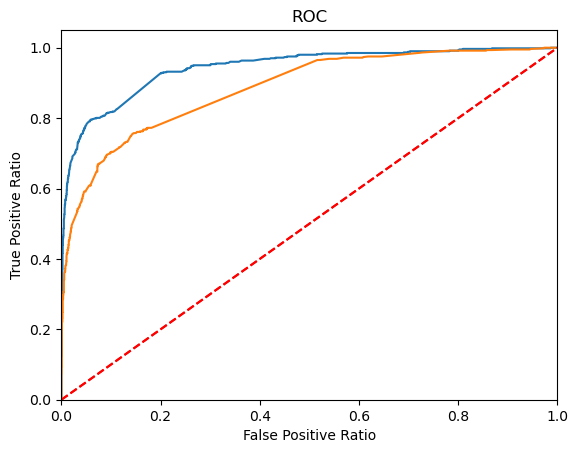

[CV] END max_depth=0, min_samples_split=2, n_estimators=1200; total time=   0.1s
[CV] END max_depth=1, min_samples_split=2, n_estimators=1200; total time=   9.6s
[CV] END max_depth=1, min_samples_split=10, n_estimators=1200; total time=   9.4s
[CV] END max_depth=2, min_samples_split=2, n_estimators=1200; total time=  14.4s
[CV] END max_depth=3, min_samples_split=2, n_estimators=1200; total time=  21.9s
[CV] END max_depth=3, min_samples_split=10, n_estimators=1200; total time=  20.4s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=1, min_samples_split=10, n_estimators=1200; total time=   7.9s
[CV] END max_depth=2, min_samples_split=10, n_estimators=1200; total time=  13.4s
[CV] END max_depth=0, min_samples_split=2, n_estimators=1200; total time=   0.1s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=1,

In [93]:
logit_roc_auc=roc_auc_score(y_gbm,gbm_model.predict(X_gbm))
fpr,tpr,thresholds=roc_curve(y_gbm,gbm_model.predict_proba(X_gbm)[:,1])
plt.figure()
plt.plot(fpr,tpr, label="AUC(area=%0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;
#UCDEGERLENDIRICI
logit_roc_auc_uc=roc_auc_score(y_gbm_uc,gbm_model_uc.predict(X_gbm_uc))
fpr_uc,tpr_uc,thresholds_uc=roc_curve(y_gbm_uc,gbm_model_uc.predict_proba(X_gbm_uc)[:,1])

plt.plot(fpr_uc,tpr_uc, label="AUC(area=%0.2f)"%logit_roc_auc_uc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;

logit_roc_auc_urunhiz_cv_ikilimodel=roc_auc_score(y_gbm_urunhiz_cv_ikilimodel,gbm_model_urunhiz_cv_ikilimodel.predict(X_gbm_urunhiz_cv_ikilimodel))
fpr_urunhiz_cv_ikilimodel,tpr_urunhiz_cv_ikilimodel,thresholds_urunhiz_cv_ikilimodel=roc_curve(y_gbm_urunhiz_cv_ikilimodel,gbm_model_urunhiz_cv_ikilimodel.predict_proba(X_gbm_urunhiz_cv_ikilimodel)[:,1])

plt.plot(fpr_urunhiz_cv_ikilimodel,tpr_urunhiz_cv_ikilimodel, label="AUC(area=%0.2f)"%logit_roc_auc_urunhiz_cv_ikilimodel)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;
pyplot. text("aaa")